### Multiple Linear Regression

#### Objectifs:
  **Utiliser scikit learn pour developper un modèle de MLR**

#### Analyse de la forme et du fond
**--------------------------Analyse de la forme------------------------**
   - Identification dela target: **CO2EMISSIONS**
   - Nombre de ligne et colonne: **1071 x 13**
   - Type des variables: **qualitatives=5, quantitatives=8**
   - Les valeurs manquantes: **aucune variable manquante**
   
**--------------------------Analyse du fond----------------------------**
   - Signification de la target: CO2EMISSIONS est l'estimation des emissions d'échappement de dixoyde de carbonnes **en gramme / km**
   - Signification des differentes variables:
   - Visualisation de la relation entre la target et les features:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/python/RL/dataset_fuelconsCO2.csv",encoding='ISO-8859-1' ,sep=';')

In [3]:
df= data.copy()

In [4]:
df.head()

,MODEL_YEAR,MAKE,MODEL_ENGINE,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### affecter X et Y (valeurs)

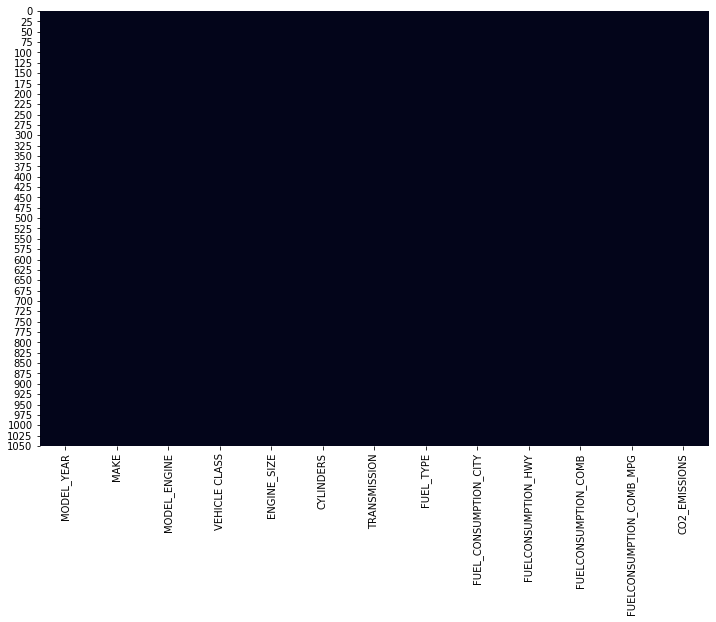

**Histogramme des variables continues**

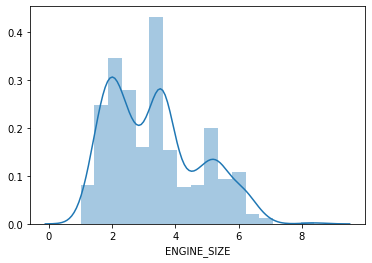

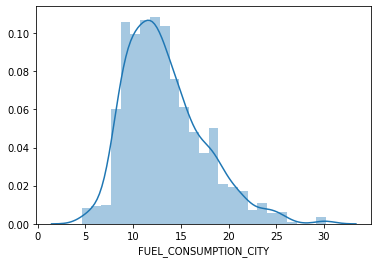

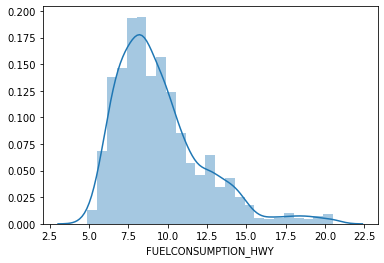

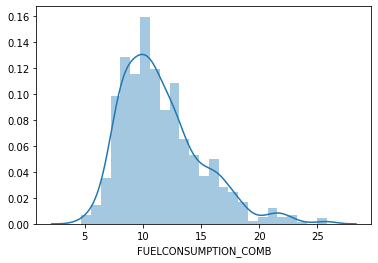

In [7]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\Aboubakr Ben Bach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aboubakr Ben Bach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


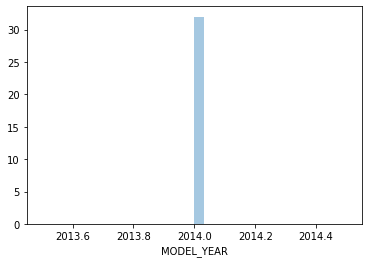

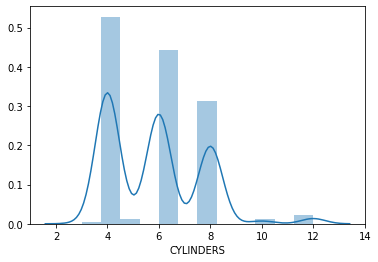

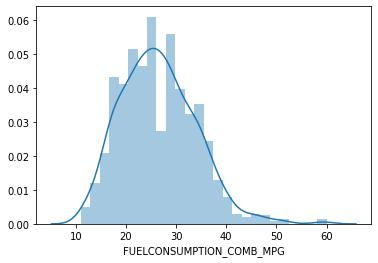

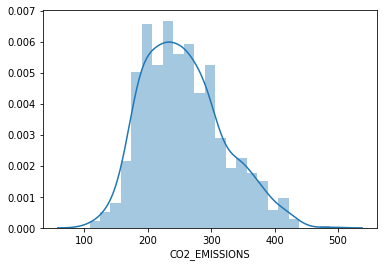

In [8]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

**Visualisation de l'ensemble de données (CO2 Emission) par rapport a Engine_Size**

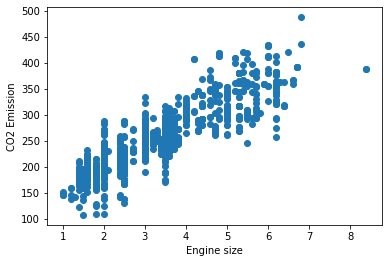

In [9]:
plt.scatter(df.ENGINE_SIZE, df.CO2_EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

**Train and test split**

In [10]:
from sklearn.model_selection import train_test_split
trainset, testset= train_test_split(df, test_size=0.2, random_state=0)

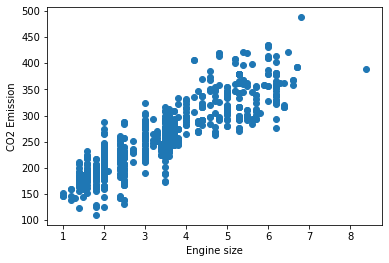

In [11]:
plt.scatter(trainset.ENGINE_SIZE, trainset.CO2_EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

### Multiple Regression Linear

En réalité, il existe plusieurs variables qui prédisent l'émission de Co2. Lorsque plusieurs variables indépendantes sont présentes, le processus est appelé régression linéaire multiple. Par exemple, prédire la co2émission à l'aide de FUELCONSUMPTION_COMB, EngineSize et Cylinders of cars. La bonne chose ici est que la régression linéaire multiple est l'extension du modèle de régression linéaire simple.

**affectation des multiples variables a X_train et la target a y_train**

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
X_train= np.asanyarray(trainset[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB_MPG','FUEL_CONSUMPTION_CITY']])
y_train= np.asanyarray(trainset[['CO2_EMISSIONS']])

X_test = np.asanyarray(testset[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y_test = np.asanyarray(testset[['CO2_EMISSIONS']])

In [92]:
X.drop(index=1)

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
5,3.5,6,11.9,7.7,10.0,28
...,...,...,...,...,...,...
1066,3.0,6,13.4,9.8,11.8,24
1067,3.2,6,13.2,9.5,11.5,25
1068,3.0,6,13.4,9.8,11.8,24
1069,3.2,6,12.9,9.3,11.3,25


In [86]:
coeff_df = pd.DataFrame(lin_model.coef_, X.columns.transpose(), columns=['Coefficient'])  
coeff_df

ValueError: Shape of passed values is (1, 6), indices imply (6, 1)

In [58]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

print("Coefficient:", lin_model.coef_)

Coefficient: [[9.94746316 8.17495838 9.91852487]]


In [51]:
def evaluation(lin_model):
      
    lin_model.fit(X_train,y_train)

    print("Coefficient:", lin_model.coef_)

    print("----------------------------------")
    y_pred = lin_model.predict(X_test)

    print("Residual sum of squares: %.2f"
          % np.mean((y_pred - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % lin_model.score(X_test, y_test))
    
    ########learning curve #####
    N, train_score, val_score= learning_curve(lin_model, X_train, y_train,
                                              cv= 4,
                                              scoring= 'neg_mean_squared_error',
                                              train_sizes= np.linspace(0.1,1,10))
    
    df_pred = pd.DataFrame({'Réel': y_test.flatten(), 'Predit': y_pred.flatten()})
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='Training error')
    plt.plot(N, val_score.mean(axis=1), label='Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
    
    print("-----------------Actual vs Pred-----------------")
    print(df_pred)
    df_pred.to_csv('Actu_predMul.csv')
    
    print("***********histo diff Actual vs Pred********")
    df1 = df_pred.head(20)
    df1.plot(kind='bar',figsize=(14,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.ylabel('CO2 Emission', fontsize = 14)
    plt.show()


Coefficient: [[9.94746316 8.17495838 9.91852487]]
----------------------------------
Residual sum of squares: 709.34
Variance score: 0.82
-----------------Actual vs Pred-----------------
     Réel      Predit
0     393  395.789581
1     317  316.432167
2     216  211.243181
3     262  260.361849
4     260  254.396265
..    ...         ...
210   334  386.853694
211   254  303.005719
212   260  259.369997
213   294  362.057381
214   308  301.522548

[215 rows x 2 columns]
***********histo diff Actual vs Pred********


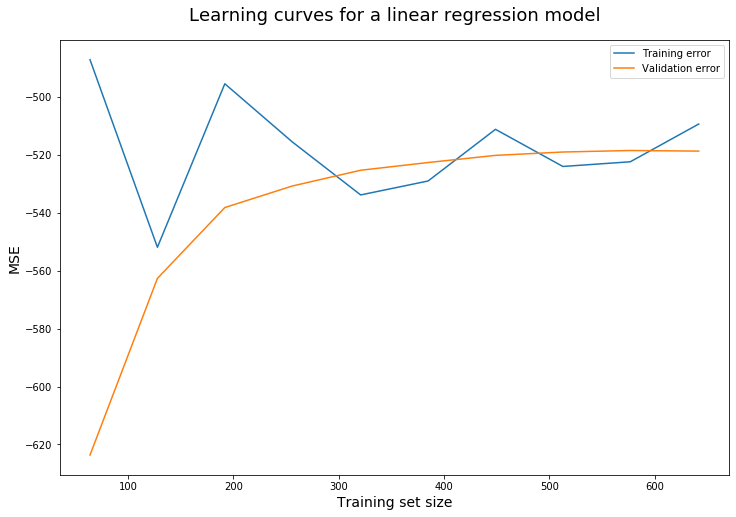

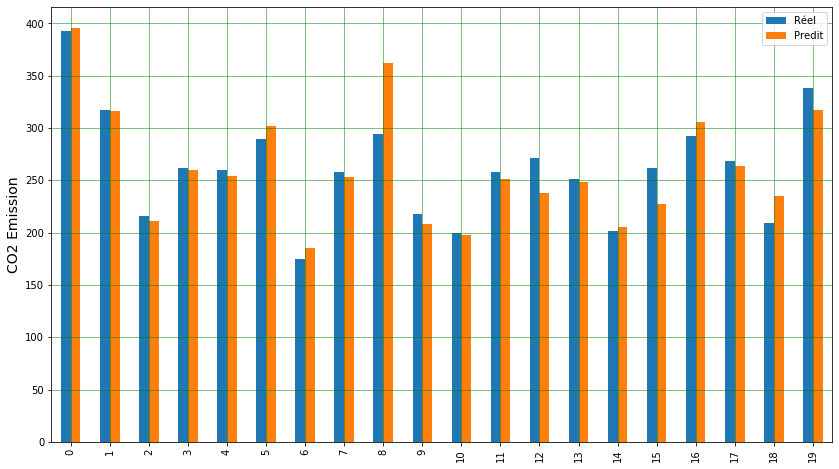

In [52]:
evaluation(lin_model)

In [79]:
X

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
1066,3.0,6,13.4,9.8,11.8,24
1067,3.2,6,13.2,9.5,11.5,25
1068,3.0,6,13.4,9.8,11.8,24
1069,3.2,6,12.9,9.3,11.3,25


In [104]:
data3 = pd.read_csv(r"C:/Users/Aboubakr Ben Bach/Desktop/ML/covid-19/corona.csv",encoding='ISO-8859-1' ,sep=';')

In [105]:
data3.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.77863,117.3319,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.00123,117.5681,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [107]:
data3['wuhan(0)_not_wuhan(1)'].isna().value_counts()

False    13170
True        29
Name: wuhan(0)_not_wuhan(1), dtype: int64